<a href="https://colab.research.google.com/github/minoring/Machine-Learning-Example/blob/master/cnn_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

    100% |████████████████████████████████| 409kB 22.5MB/s 


In [2]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

tf.enable_eager_execution()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


In [3]:
dataset, metadata = tfds.load('fashion_mnist', 
                              as_supervised=True, 
                              with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
# Store class names to use when plotting the images.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
# Normalize each pixel value in the image to the range[0, 1]
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

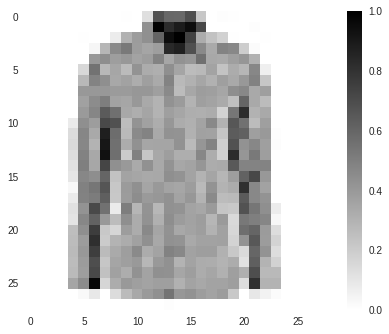

In [7]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

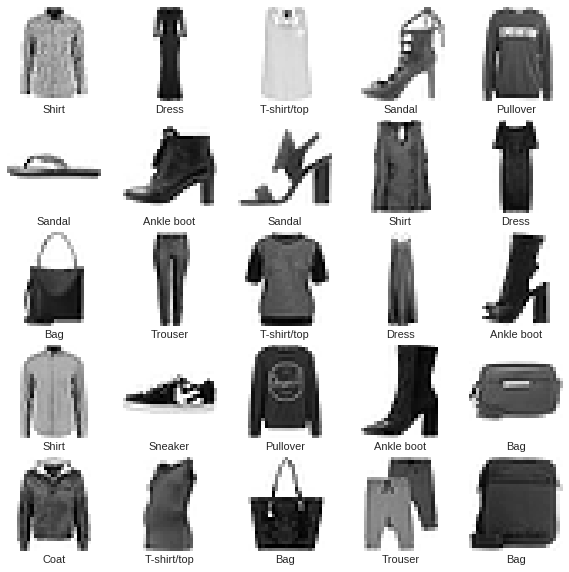

In [12]:
# Display the first 25 images from the training
# and display the class name below each image

plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu,
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = (train_dataset
                .repeat()
                .shuffle(num_train_examples)
                .batch(BATCH_SIZE))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [18]:
model.fit(train_dataset,
         epochs=10,
         steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3946 - acc: 0.8599
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2578 - acc: 0.9062
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2078 - acc: 0.9236
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1767 - acc: 0.9344
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1505 - acc: 0.9442
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1280 - acc: 0.9528
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1049 - acc: 0.9612
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0898 - acc: 0.9671
Epoch 9/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0723 - acc: 0.9726
Epoch 10/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0643 - acc: 0.9767


In [20]:
# Evaluate accuracy
test_loss, test_accuracy = model.evaluate(
                              test_dataset,
                              steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.3177 - acc: 0.9169
Accuracy on test dataset: 0.9169


In [0]:
# Make predictions about some images.
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [23]:
predictions.shape

(32, 10)

In [27]:
# 10 numbers describe the "confidence" of the model
predictions[0]

array([4.5722011e-08, 8.3915383e-12, 8.2942388e-05, 7.8303850e-07,
       2.0889230e-02, 2.7466243e-11, 9.7902703e-01, 1.4828914e-11,
       2.8087005e-13, 5.3154903e-09], dtype=float32)

In [28]:
np.argmax(predictions[0])

6

In [29]:
test_labels[0]

6

In [0]:
# We can graph this to look at the full set of 10 channels
def plot_image(i, predictions_array, true_labels, images):
  predictions_array = predictions_array[i]
  true_label = true_labels[i]
  img = images[i]
  
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                     100*np.max(predictions_array),
                                     class_names[true_label]),
                                     color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array = predictions_array[i]
  true_label = true_label[i]
  
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

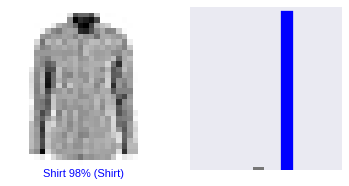

In [38]:
# Let's look at the 0th image, predictions, and prediction array.

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

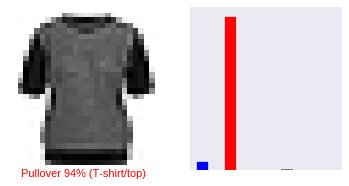

In [39]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

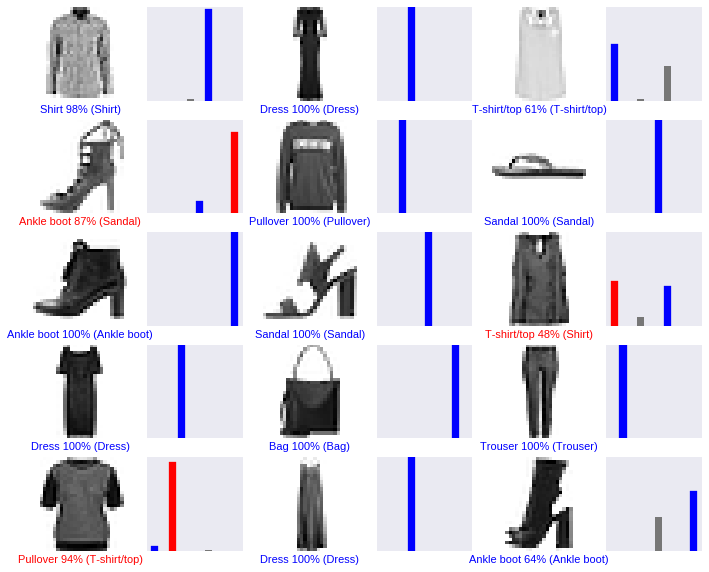

In [40]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [41]:
# Prediction about a single image.
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [42]:
# tf.keras models are optimized to make predictions on a batch, or collection, 
# of examples at once. So even though we're using a single image, 
# we need to add it to a list

# Add the image to a batch where it's the only member.
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [43]:
# Not predict the image
predictions_single = model.predict(img)
print(predictions_single)

[[4.5721922e-08 8.3915071e-12 8.2941988e-05 7.8303617e-07 2.0889159e-02
  2.7466087e-11 9.7902703e-01 1.4828829e-11 2.8086789e-13 5.3154903e-09]]


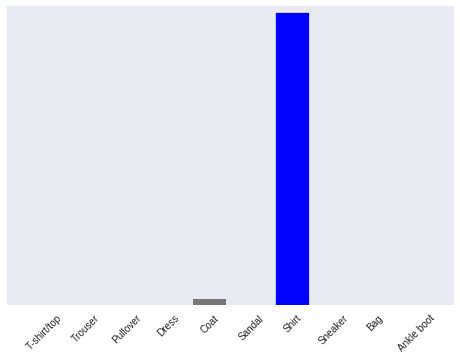

In [44]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [46]:
np.argmax(predictions_single[0])

6